In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
df = pd.read_csv('pokedex.csv')
print(df.shape)
df.head()


(1025, 13)


id        name  height  weight  hp  attack  defense  s_attack  s_defense  \
0   1   bulbasaur       7      69  45      49       49        65         65   
1   2     ivysaur      10     130  60      62       63        80         80   
2   3    venusaur      20    1000  80      82       83       100        100   
3   4  charmander       6      85  39      52       43        60         50   
4   5  charmeleon      11     190  58      64       58        80         65   

   speed            type  evo_set  \
0     45  {grass,poison}        1   
1     60  {grass,poison}        1   
2     80  {grass,poison}        1   
3     65          {fire}        2   
4     80          {fire}        2   

                                                info  
0  A strange seed was planted on its back at birt...  
1  When the bulb on its back grows large, it appe...  
2  The plant blooms when it is absorbing solar en...  
3  Obviously prefers hot places. When it rains, s...  
4  When it swings its burning tail, it elevates t...

In [11]:
df = df.drop(columns=["info"], errors="ignore")

display(df.sample(5))
print("\nTipos de dados:")
print(df.dtypes)

print("\nValores ausentes por coluna:")
print(df.isna().sum())

display(df.describe())

if "type" in df.columns:
    print("\nExemplos de 'type':", df["type"].head(10).tolist())


id       name  height  weight   hp  attack  defense  s_attack  \
526  527     woobat       4      21   65      45       43        55   
372  373  salamence      15    1026   95     135       80       110   
35    36   clefable      13     400   95      70       73        95   
162  163   hoothoot       7     212   60      30       30        36   
241  242    blissey      15     468  255      10       10        75   

     s_defense  speed              type  evo_set  
526         43     72  {psychic,flying}      269  
372         80    100   {dragon,flying}      191  
35          90     60           {fairy}       14  
162         56     50   {normal,flying}       83  
241        135     55          {normal}       51


Tipos de dados:
id            int64
name         object
height        int64
weight        int64
hp            int64
attack        int64
defense       int64
s_attack      int64
s_defense     int64
speed         int64
type         object
evo_set       int64
dtype: object

Valores ausentes por coluna:
id           0
name         0
height       0
weight       0
hp           0
attack       0
defense      0
s_attack     0
s_defense    0
speed        0
type         0
evo_set      0
dtype: int64


id       height       weight           hp       attack  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean    513.000000    12.116098   669.865366    70.184390    77.521951   
std     296.036315    12.481673  1212.731138    26.631054    29.782541   
min       1.000000     1.000000     1.000000     1.000000     5.000000   
25%     257.000000     5.000000    85.000000    50.000000    55.000000   
50%     513.000000    10.000000   280.000000    68.000000    75.000000   
75%     769.000000    15.000000   700.000000    85.000000   100.000000   
max    1025.000000   200.000000  9999.000000   255.000000   181.000000   

           defense     s_attack    s_defense        speed      evo_set  
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  
mean     72.507317    70.080976    70.205854    67.186341   253.195122  
std      29.286972    29.658378    26.639329    28.717227   159.505305  
min       5.000000    10.000000    20.000000     5.000000     1.000000  
25%      50.000000    47.000000    50.000000    45.000000   110.000000  
50%      70.000000    65.000000    67.000000    65.000000   257.000000  
75%      90.000000    90.000000    86.000000    88.000000   387.000000  
max     230.000000   173.000000   230.000000   200.000000   549.000000


Exemplos de 'type': ['{grass,poison}', '{grass,poison}', '{grass,poison}', '{fire}', '{fire}', '{fire,flying}', '{water}', '{water}', '{water}', '{bug}']


In [12]:
def parse_types(cell):
    try:
        s = str(cell).strip()
        s = s.strip("{}")
        parts = [p.strip() for p in s.split(",") if p.strip()]
        return parts
    except Exception:
        return []

types_parsed = df["type"].apply(parse_types)

df["primary_type"] = types_parsed.apply(lambda ts: ts[0] if len(ts) > 0 else "unknown")
df["secondary_type"] = types_parsed.apply(lambda ts: ts[1] if len(ts) > 1 else "none")
df["is_multi_type"] = types_parsed.apply(lambda ts: int(len(ts) > 1))

num_cols_base = ["hp","attack","defense","s_attack","s_defense","speed"]
df["total_stats"] = df[num_cols_base].sum(axis=1)
df["phys_density"] = df["weight"] / (df["height"].replace(0, np.nan))   # peso/altura (proxy simples)
df["atk_def_ratio"] = df["attack"] / df["defense"].replace(0, np.nan)
df["sp_atk_def_ratio"] = df["s_attack"] / df["s_defense"].replace(0, np.nan)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

print("Novas colunas criadas:", [c for c in df.columns if c not in ["id","name","height","weight","hp","attack","defense","s_attack","s_defense","speed","type","info","evo_set"]][:10], "...")
df.head()


Novas colunas criadas: ['primary_type', 'secondary_type', 'is_multi_type', 'total_stats', 'phys_density', 'atk_def_ratio', 'sp_atk_def_ratio'] ...


id        name  height  weight  hp  attack  defense  s_attack  s_defense  \
0   1   bulbasaur       7      69  45      49       49        65         65   
1   2     ivysaur      10     130  60      62       63        80         80   
2   3    venusaur      20    1000  80      82       83       100        100   
3   4  charmander       6      85  39      52       43        60         50   
4   5  charmeleon      11     190  58      64       58        80         65   

   speed            type  evo_set primary_type secondary_type  is_multi_type  \
0     45  {grass,poison}        1        grass         poison              1   
1     60  {grass,poison}        1        grass         poison              1   
2     80  {grass,poison}        1        grass         poison              1   
3     65          {fire}        2         fire           none              0   
4     80          {fire}        2         fire           none              0   

   total_stats  phys_density  atk_def_ratio  sp_atk_def_ratio  
0          318      9.857143       1.000000          1.000000  
1          405     13.000000       0.984127          1.000000  
2          525     50.000000       0.987952          1.000000  
3          309     14.166667       1.209302          1.200000  
4          405     17.272727       1.103448          1.230769

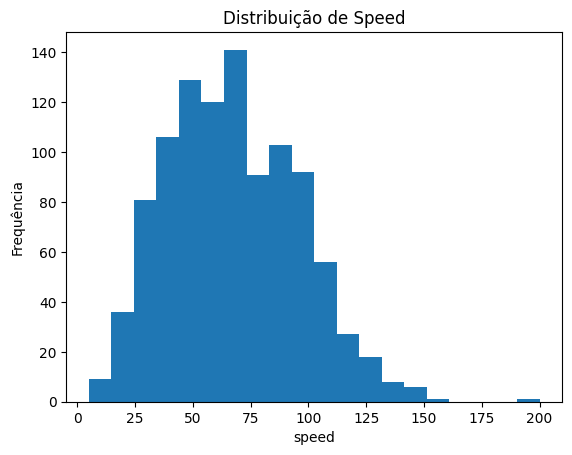

C:\Users\igorv\AppData\Local\Temp\ipykernel_9988\3217875368.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top_types, showfliers=True)


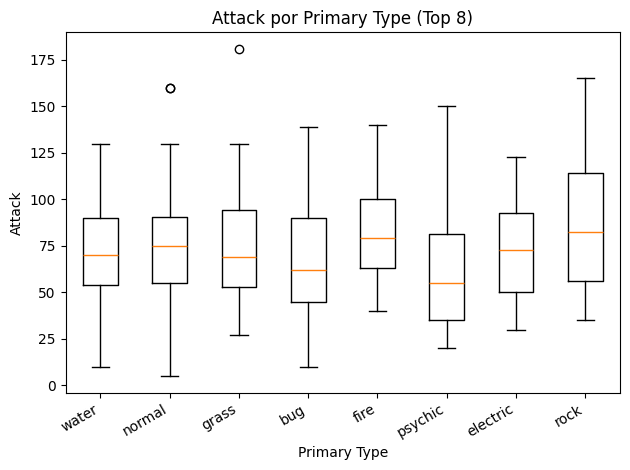

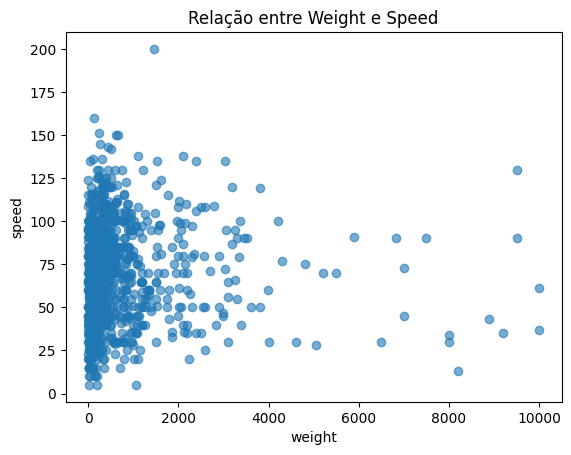

In [13]:
plt.figure()
plt.hist(df["speed"].dropna(), bins=20)
plt.title("Distribuição de Speed")
plt.xlabel("speed")
plt.ylabel("Frequência")
plt.show()

top_types = df["primary_type"].value_counts().head(8).index.tolist()
subset = df[df["primary_type"].isin(top_types)]

plt.figure()
data_to_plot = [subset[subset["primary_type"]==t]["attack"].dropna() for t in top_types]
plt.boxplot(data_to_plot, labels=top_types, showfliers=True)
plt.title("Attack por Primary Type (Top 8)")
plt.xlabel("Primary Type")
plt.ylabel("Attack")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

plt.figure()
plt.scatter(df["weight"], df["speed"], alpha=0.6)
plt.title("Relação entre Weight e Speed")
plt.xlabel("weight")
plt.ylabel("speed")
plt.show()

In [14]:

# Exemplo 1: Ataque médio de Fire vs Water (H0: medias iguais; H1: diferentes)
group_fire = df[df["primary_type"]=="fire"]["attack"].dropna()
group_water = df[df["primary_type"]=="water"]["attack"].dropna()

t_stat, p_val = stats.ttest_ind(group_fire, group_water, equal_var=False, nan_policy="omit")
print(f"T-test Attack (Fire vs Water): t={t_stat:.3f}, p={p_val:.4f}")

def bootstrap_ci_diff(a, b, n_boot=5000, alpha=0.05, rng=42):
    rng = np.random.default_rng(rng)
    diffs = []
    for _ in range(n_boot):
        sa = rng.choice(a, size=len(a), replace=True)
        sb = rng.choice(b, size=len(b), replace=True)
        diffs.append(np.mean(sa) - np.mean(sb))
    lo = np.percentile(diffs, 100*alpha/2)
    hi = np.percentile(diffs, 100*(1-alpha/2))
    return np.mean(diffs), lo, hi

if len(group_fire) > 1 and len(group_water) > 1:
    diff_mean, lo, hi = bootstrap_ci_diff(group_fire.values, group_water.values)
    print(f"Diferença de médias (Fire - Water): {diff_mean:.2f} | IC95% = ({lo:.2f}, {hi:.2f})")
else:
    print("Amostras insuficientes para bootstrap.")

# Exemplo 2 (unilateral): velocidade média Electric > Rock ?
group_elec = df[df["primary_type"]=="electric"]["speed"].dropna()
group_rock = df[df["primary_type"]=="rock"]["speed"].dropna()

# t-teste unilateral: H0: mu_elec <= mu_rock  vs  H1: mu_elec > mu_rock
t2, p2_two_sided = stats.ttest_ind(group_elec, group_rock, equal_var=False, nan_policy="omit")
p2_one_sided = p2_two_sided/2 if t2 > 0 else 1 - p2_two_sided/2
print(f"T-test (unilateral) Speed (Electric > Rock): t={t2:.3f}, p_unilateral={p2_one_sided:.4f}")


T-test Attack (Fire vs Water): t=2.679, p=0.0084
Diferença de médias (Fire - Water): 10.32 | IC95% = (3.03, 18.10)
T-test (unilateral) Speed (Electric > Rock): t=5.301, p_unilateral=0.0000


In [15]:
SKLEARN_OK = 'lr' in globals()

# Criação de um perfil hipotético de Pokémon para prever 'speed' (apenas se sklearn estiver disponível)
if SKLEARN_OK:
    example = {
        "height": 10, "weight": 300, "hp": 70, "attack": 85, "defense": 70, "s_attack": 90, "s_defense": 75,
        "evo_set": 2, "total_stats": 70+85+70+90+75+80, "phys_density": 300/10, "atk_def_ratio": 85/max(1,70),
        "sp_atk_def_ratio": 90/max(1,75), "is_multi_type": 1
    }

    # Montar dummies coerentes (ex.: primary_type = 'electric')
    ptype = "electric"
    dummies_cols = [c for c in X.columns if c.startswith("ptype_")]
    example_row = pd.DataFrame([example])
    for col in dummies_cols:
        example_row[col] = 1 if col == f"ptype_{ptype}" else 0

    # Garantir todas as colunas existentes
    for col in X.columns:
        if col not in example_row.columns:
            example_row[col] = 0
    example_row = example_row[X.columns]

    pred_speed = lr.predict(example_row)[0]
    print(f"Previsão de speed para o perfil hipotético ({ptype}): {pred_speed:.1f}")
else:
    print("Scikit-learn indisponível para previsão.")


Scikit-learn indisponível para previsão.


In [16]:

def mean_ci(x, alpha=0.05):
    x = pd.Series(x).dropna()
    n = x.size
    m = x.mean()
    s = x.std(ddof=1)
    z = stats.norm.ppf(1 - alpha/2)
    se = s/np.sqrt(n)
    return m, m - z*se, m + z*se

# Exemplo de uso:
m, lo, hi = mean_ci(df["speed"])
print(f"Média speed = {m:.2f} | IC95% = ({lo:.2f}, {hi:.2f})")


Média speed = 67.19 | IC95% = (65.43, 68.94)
